# 자연어 처리 발전과정 (Seq2Seq → Attention → Transformer)

## 1. Seq2Seq (Sequence to Sequence) 모델

### 1-1. 등장 배경

- 기존 RNN은 시퀀스 데이터를 순차적으로 처리할 수 있지만, 입력과 출력의 길이가 동일하거나 고정된 형태로만 모델링되는 한계가 존재했습니다.
  - 예시 :  입력 시퀀스가 10단어이면 출력도 10단어로 제한되는 구조이기 때문에, 번역처럼 입력과 출력 길이가 다른 작업에는 부적합

- 이러한 한계를 극복하기 위해 Encoder–Decoder 구조를 도입하여, 인코더가 입력 시퀀스를 고정 길이의 문맥 벡터(Context Vector) 로 압축하고,  
디코더가 이를 기반으로 가변 길이의 출력 시퀀스를 생성함으로써 입력과 출력의 길이가 달라도 학습이 가능하도록 했습니다.  

- 2014년 Google의 연구팀(Sutskever et al.)에 의해 처음 제안되었으며 
**기계 번역(Machine Translation)** 에서 탁월한 성능을 보인 뒤,  
이후에는 요약(Summarization), 질의응답(QA), 대화(Chatbot) 등 다양한 자연어 처리(NLP) 분야로 확장되었습니다.

### 1-2. 구조
- 입력 시퀀스를 받아 출력 시퀀스를 생성하는 순환신경망 기반 인코더-디코더 구조  
- 입력 문장을 요약한 **`컨텍스트 벡터(Context Vector)`** 를 통해 디코더가 출력 생성  
- **인코더(Encoder)**: 입력 문장을 고정 길이 벡터로 변환  
- **디코더(Decoder)**: 벡터를 받아 단어를 순차적으로 출력
  
  <img src="image/seq2seq.gif">

### 1-3. 사용 예시

- **기계 번역 (Machine Translation)**: 예를 들어 영어 문장을 프랑스어 문장으로 변환하는 작업에 사용됩니다.
- **텍스트 요약 (Text Summarization)**: 긴 텍스트를 짧은 요약문으로 압축하는 작업에 유용합니다.
- **질문 응답 시스템 (Question Answering)**: 질문을 입력으로 받고, 그에 대한 답변을 생성합니다.
- **챗봇 (Chatbot)**: 사용자의 발화(입력)에 따라 적절한 응답(출력)을 생성하는 대화 시스템에 적용됩니다.

### 1-4. Seq2Seq 모델의 작동 원리

- Seq2Seq 모델은 `인코더(Encoder)`와 `디코더(Decoder)`라는 두 개의 RNN으로 구성됩니다.

#### 인코더 (Encoder)

- 인코더는 입력 시퀀스를 받아 **컨텍스트 벡터(Context Vector)** 라는 고정 길이의 벡터로 변환합니다.  
  이 벡터는 입력 시퀀스의 의미를 요약한 정보로, 디코더가 출력을 생성할 때 사용됩니다.

1. 입력 시퀀스 $x = (x_1, x_2, \dots, x_T)$는 RNN 계층을 거치며 각 타임스텝에서 은닉 상태를 갱신합니다.  
2. 은닉 상태는 다음 수식으로 업데이트됩니다:  $h_t^{enc} = f_{\text{enc}}(h_{t-1}^{enc}, x_t)$
3. 초기 상태 $h_0^{enc}$는 일반적으로 0 벡터로 설정됩니다.
4. 마지막 타임스텝에서 생성된 은닉 상태 $h_T^{enc}$가 **컨텍스트 벡터**가 되어 디코더로 전달됩니다.


<img src="image/seq2seq.gif">

#### 디코더 (Decoder)

- 디코더는 인코더로부터 전달받은 **컨텍스트 벡터(Context Vector)** 를 초기 은닉 상태로 사용하여 출력 시퀀스를 생성합니다.  
- 또한 디코더는 RNN 구조로 동작하며, **이전 은닉 상태와 이전 출력 $y_{t-1}$** 을 입력으로 받아 새로운 은닉 상태와 출력을 만들어냅니다.

1. 디코더는 인코더가 생성한 컨텍스트 벡터를 초기 은닉 상태로 설정합니다.  
   
   $$h_0^{dec} = c$$

2. 첫 번째 타임스텝에서는 시작 토큰(SOS)을 입력으로 사용하여 은닉 상태를 갱신합니다.  
   $$
   h_1^{dec} = f_{\text{dec}}(h_0^{dec}, y_0)
   $$
   갱신된 은닉 상태로 첫 번째 출력 단어를 생성합니다.  
   $$
   y_1 = g(h_1^{dec})
   $$

3. 두 번째 및 이후 타임스텝에서는 이전 출력과 은닉 상태를 이용해 다음 은닉 상태를 계산합니다.  
   $$
   h_2^{dec} = f_{\text{dec}}(h_1^{dec}, y_1)
   $$
   $$
   y_2 = g(h_2^{dec})
   $$

   $$
   h_3^{dec} = f_{\text{dec}}(h_2^{dec}, y_2)
   $$
   $$
   y_3 = g(h_3^{dec})
   $$

4. 일반화하면, 디코더는 다음과 같은 방식으로 동작합니다.  
   $$
   h_t^{dec} = f_{\text{dec}}(h_{t-1}^{dec}, y_{t-1}), \quad t = 1, 2, 3, \dots
   $$
   $$
   y_t = g(h_t^{dec})
   $$

여기서  
- $f_{\text{dec}}(\cdot)$ : 디코더 RNN 셀의 갱신 함수  
- $g(\cdot)$ : 현재 은닉 상태를 바탕으로 단어 확률 분포를 생성하는 함수 (선형 변환 + softmax 등)

#### 요약 
1. **인코더 쪽 애니메이션**  
   - $x_1 \rightarrow h_1^{enc}$  
   - $x_2 \rightarrow h_2^{enc}$  
   - …  
   - $x_T \rightarrow h_T^{enc} = c$ (컨텍스트 벡터 생성)

2. **디코더 쪽 애니메이션**  
   - $h_0^{dec} = c$  
   - $h_1^{dec} = f_{\text{dec}}(h_0^{dec}, y_0)$ → $y_1 = g(h_1^{dec})$  
   - $h_2^{dec} = f_{\text{dec}}(h_1^{dec}, y_1)$ → $y_2 = g(h_2^{dec})$  
   - $h_3^{dec} = f_{\text{dec}}(h_2^{dec}, y_2)$ → $y_3 = g(h_3^{dec})$ 

### 1-5 Seq2Seq 모델의 장단점

**장점**
- **유연성**: 입력과 출력 시퀀스의 길이가 달라도 처리할 수 있습니다.
- **다양한 응용 분야**: 자연어 처리에서 매우 다양한 작업에 사용할 수 있습니다.
- **어텐션을 통한 성능 개선**: 어텐션 메커니즘으로 긴 시퀀스에서도 정확한 출력을 생성할 수 있습니다.

**단점**
- **병렬 처리 어려움**: RNN 구조 특성상 병렬 처리가 어려워, 훈련 및 추론 속도가 느립니다.
- **고정 길이 컨텍스트 벡터의 한계**: 초기 Seq2Seq 모델은 인코더가 모든 입력 정보를 고정 길이 벡터로 요약해야 하므로, **긴 문장에서 정보 손실**이 발생할 수 있습니다.

### Seq2Seq 모델을 활용한 기계번역 코드 예시

In [1]:
from datasets import load_dataset

# Hugging Face의 영어-한국어 병렬(문장쌍) 데이터 로드
dataset = load_dataset("strongminsu/ko-en-structured-translations")

print(dataset)
print(dataset['train'][0])

DatasetDict({
    train: Dataset({
        features: ['id', 'topic', 'style', 'type', 'ko', 'en', 'model', 'prompt_version', 'created_at', 'split'],
        num_rows: 7594
    })
    validation: Dataset({
        features: ['id', 'topic', 'style', 'type', 'ko', 'en', 'model', 'prompt_version', 'created_at', 'split'],
        num_rows: 949
    })
    test: Dataset({
        features: ['id', 'topic', 'style', 'type', 'ko', 'en', 'model', 'prompt_version', 'created_at', 'split'],
        num_rows: 950
    })
})
{'id': 966, 'topic': '건강', 'style': '대화체', 'type': '조건문', 'ko': '스트레스를 관리하지 않으면 문제가 생길 수 있어.', 'en': "If you don't manage your stress, problems may arise.", 'model': 'gpt-4o-mini', 'prompt_version': 'v2_structured', 'created_at': '20251205_160208', 'split': 'train'}


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# 학습 환경 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
from transformers import AutoTokenizer

# 다국어 모델용 토크나이저 (예: T5 또는 MarianMT 등)
tokenizer = AutoTokenizer.from_pretrained("tunib/electra-ko-en-small")

# 디코더 시작 토큰(BOS)과 종료토큰 저장
BOS_TOKEN_ID = tokenizer.cls_token_id
EOS_TOKEN_ID = tokenizer.sep_token_id
    
dataset_train = dataset['train'].shuffle(seed=42)
dataset_test = dataset['test'].shuffle(seed=42)

In [4]:

# 토큰화 함수 정의
def preprocess_function(examples):
    # 영어 문장('en')을 입력으로, 한국어 문장('ko')을 번역 타겟으로 지정
    # → text_target 매개변수는 Seq2Seq 모델(예: MarianMT, T5 등)에서 "정답 시퀀스" 역할을 함.
    model_inputs = tokenizer(
        text = examples['en'],        # 인코더 입력: 영어 문장 리스트
        text_target=examples['ko'],   # 디코더 출력(타깃): 한국어 문장 리스트
        truncation=True,              # 시퀀스가 max_length보다 길면 잘라냄 (GPU 메모리 절약)
        padding='max_length',         # 모든 문장을 동일 길이(64)로 패딩 (batch 처리 용이)
        max_length=64                 # 시퀀스 최대 길이 (64 토큰 기준으로 제한)
    )
    
    return model_inputs

tokenized_dataset_train = dataset_train.map(preprocess_function, batched=True)
# 필요한 컬럼만 남기고, PyTorch 텐서 형태로 변환
tokenized_dataset_train.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

tokenized_dataset_test = dataset_test.map(preprocess_function, batched=True)
tokenized_dataset_test.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# DataLoader로 배치 단위로 불러오기
train_loader = DataLoader(tokenized_dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(tokenized_dataset_test, batch_size=64, shuffle=True)

In [5]:
# 인코더: 입력 시퀀스를 임베딩한 뒤 GRU로 요약, 마지막 hidden만 반환
class Encoder(nn.Module):
    """
    입력 문장을 임베딩하고 GRU로 인코딩하는 모듈.
    최종 hidden state를 decoder로 전달.
    """
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers=1, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim) # weight: (vocab_size, emb_dim) 
        self.gru = nn.GRU(emb_dim, hid_dim, n_layers, dropout=dropout, batch_first=True) # 입력: (batch, seq_len, emb_dim) 출력: (batch, seq_len, hid_dim)

    def forward(self, src, src_mask=None):
        # src: (batch, src_len) token ids
        embedded = self.embedding(src) # 입력: (batch, src_len) 출력: (batch, src_len, emb_dim)
        outputs, hidden = self.gru(embedded) # 입력: (batch, src_len, emb_dim) hidden: (n_layers, batch, hid_dim)
        return hidden # 출력: (n_layers, batch, hid_dim)


# 디코더: 직전 토큰과 hidden을 받아 다음 토큰 분포를 예측
class Decoder(nn.Module):
    """
    이전 단어와 hidden state를 받아서 다음 단어를 예측.
    """
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers=1, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(output_dim, emb_dim) # weight: (vocab_size, emb_dim)
        self.gru = nn.GRU(emb_dim, hid_dim, n_layers, dropout=dropout, batch_first=True) # 입력: (batch, 1, emb_dim) 출력: (batch, 1, hid_dim)
        self.fc_out = nn.Linear(hid_dim, output_dim) # 입력: (batch, hid_dim) 출력: (batch, vocab_size)
        self.dropout = nn.Dropout(dropout) # 과적합 방지용

    def forward(self, input, hidden):
        # input: (batch) 현재 시점의 토큰 id
        input = input.unsqueeze(1) # 입력: (batch) → 출력: (batch, 1) 시퀀스 길이 1로 맞춤
        embedded = self.dropout(self.embedding(input)) # 입력: (batch, 1) 출력: (batch, 1, emb_dim)
        output, hidden = self.gru(embedded, hidden) # output: (batch, 1, hid_dim) hidden: (n_layers, batch, hid_dim)
        prediction = self.fc_out(output.squeeze(1)) # 입력: (batch, hid_dim) 출력: (batch, vocab_size)
        return prediction, hidden # prediction은 다음 단어 확률 분포, hidden은 다음 스텝으로 전달

# Seq2Seq 연결: 인코더 → 디코더, teacher forcing 포함
class Seq2Seq(nn.Module):
    """
    Encoder와 Decoder를 연결하는 Seq2Seq 모델.
    """
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        """
        src: (batch, src_len) 입력 문장 토큰 id
        trg: (batch, trg_len) 정답 문장 토큰 id
        """
        batch_size = src.shape[0] # 배치 크기
        trg_len = trg.shape[1] # 출력 문장 길이
        trg_vocab_size = self.decoder.fc_out.out_features # 출력 단어 수 = vocab_size

        # 디코더의 모든 시점 출력을 저장 (정답 길이만큼)
        outputs = torch.zeros(batch_size, trg_len, trg_vocab_size).to(self.device) # (batch, trg_len, vocab_size)

        # 인코더 통과 → 문장 요약 hidden 생성
        hidden = self.encoder(src) # 출력: (n_layers, batch, hid_dim)

        # 디코더 첫 입력은 <sos> 토큰
        input = trg[:, 0] # # 입력: (batch). 각 문장의 0번째 토큰(<sos>)

        for t in range(1, trg_len):
            # 한 타임스텝 디코딩
            output, hidden = self.decoder(input, hidden) # output: (batch, vocab_size)
            outputs[:, t] = output # t번째 위치에 예측 결과 저장

            # teacher forcing 여부 결정
            teacher_force = torch.rand(1).item() < teacher_forcing_ratio # 확률적으로 정답 사용
            top1 = output.argmax(1) # 모델이 예측한 단어 id
            input = trg[:, t] if teacher_force else top1 # 정답 또는 예측을 다음 입력으로 사용

        return outputs # (batch, trg_len, vocab_size)

In [6]:
# 모델 초기화
INPUT_DIM = len(tokenizer.get_vocab())  # 입력 언어 vocab_size (토큰 ID 범위)
OUTPUT_DIM = len(tokenizer.get_vocab()) # 출력 언어 vocab_size (같은 tokenizer 사용)
EMB_DIM = 256                           # 단어 임베딩 차원
HID_DIM = 256                           # RNN hidden state 차원

enc = Encoder(INPUT_DIM, EMB_DIM, HID_DIM) # input_dim = vocab_size (seq_len 아님)
dec = Decoder(OUTPUT_DIM, EMB_DIM, HID_DIM) # output_dim = vocab_size
model = Seq2Seq(enc, dec, device).to(device)

# 손실함수 & 옵티마이저
criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id) # <pad>는 loss 계산에서 제외
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 6. 학습 루프
def train(model, iterator, optimizer, criterion, clip=1.0):
    model.train()
    epoch_loss = 0

    for batch in iterator:
        src = batch['input_ids'].to(device)  # (batch, src_len) 입력 문장 토큰 ID
        trg = batch['labels'].to(device)     # (batch, trg_len) 정답 문장 토큰 ID

        optimizer.zero_grad()

        output = model(src, trg)  # (batch, trg_len, vocab_size) 각 시점별 단어 확률

        # 첫 토큰(<sos>)은 loss 계산에서 제외
        output_dim = output.shape[-1]
        output = output[:, 1:].reshape(-1, output_dim) # (batch*(trg_len-1), vocab_size)
        trg = trg[:, 1:].reshape(-1)                    # (batch*(trg_len-1))

        loss = criterion(output, trg)
        loss.backward()

        # gradient clipping (RNN 학습 안정화)
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        optimizer.step()
        epoch_loss += loss.item()

    return epoch_loss / len(iterator)

/root/micromamba/envs/py310/lib/python3.10/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn(


In [7]:
# 평가 (Greedy Decoding)
def translate_sentence(model, sentence_tensor, max_len=64):
    model.eval()
    with torch.no_grad():
        # 인코더는 여전히 소스 문장 전체를 본다
        hidden = model.encoder(sentence_tensor)  # sentence_tensor: (1, src_len)

        # 디코더의 첫 입력은 항상 "타깃 시작 토큰(BOS)"
        input_token = torch.full(
            (sentence_tensor.size(0),),  # batch_size (여기선 1)
            BOS_TOKEN_ID,
            dtype=torch.long,
            device=sentence_tensor.device,
        )

        outputs = []

        for _ in range(max_len):
            output, hidden = model.decoder(input_token, hidden)  # output: (batch, vocab)
            top1 = output.argmax(1)  # (batch,)
            outputs.append(top1.item())

            # 다음 입력은 직전 시점에서 뽑은 토큰
            input_token = top1

        return outputs


# 학습 실행
N_EPOCHS = 10
train_losses = []   # 에포크별 loss 저장
for epoch in tqdm(range(N_EPOCHS)):
    train_loss = train(model, train_loader, optimizer, criterion)
    train_losses.append(train_loss)  # loss 기록
    print(f"Epoch [{epoch+1}/{N_EPOCHS}] | Train Loss: {train_loss:.4f}")

print("Training complete!")


 10%|█         | 1/10 [02:00<18:08, 120.93s/it]

Epoch [1/10] | Train Loss: 6.2230


 20%|██        | 2/10 [04:01<16:06, 120.86s/it]

Epoch [2/10] | Train Loss: 5.0890


 30%|███       | 3/10 [06:02<14:05, 120.80s/it]

Epoch [3/10] | Train Loss: 4.7535


 40%|████      | 4/10 [08:03<12:04, 120.81s/it]

Epoch [4/10] | Train Loss: 4.4268


 50%|█████     | 5/10 [10:04<10:04, 120.83s/it]

Epoch [5/10] | Train Loss: 4.1509


 60%|██████    | 6/10 [12:04<08:03, 120.82s/it]

Epoch [6/10] | Train Loss: 3.9382


 70%|███████   | 7/10 [14:05<06:02, 120.78s/it]

Epoch [7/10] | Train Loss: 3.7490


 80%|████████  | 8/10 [16:06<04:01, 120.79s/it]

Epoch [8/10] | Train Loss: 3.5054


 90%|█████████ | 9/10 [18:07<02:00, 120.80s/it]

Epoch [9/10] | Train Loss: 3.4238


100%|██████████| 10/10 [20:08<00:00, 120.82s/it]

Epoch [10/10] | Train Loss: 3.1956
Training complete!


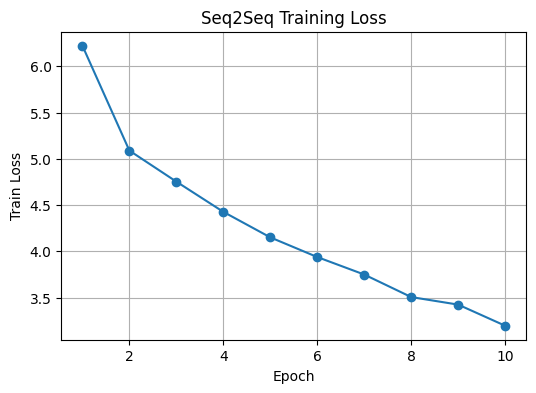

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(1, N_EPOCHS + 1), train_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Seq2Seq Training Loss')
plt.grid(True)
plt.show()

In [9]:
# 9. 번역 테스트
sample = next(iter(train_loader))

# 1) 소스 문장 (영어) 텐서 준비
src_sample = sample['input_ids'][0].unsqueeze(0).to(device)  # shape: (1, seq_len)

# 2) 모델로 번역 토큰 ID 생성
translation_ids = translate_sentence(model, src_sample)

# 3) 토큰 ID → 텍스트 복원
#   - src_sample[0]: 소스 영어 문장의 토큰 ID
#   - sample['labels'][0]: 타깃 한국어 정답 문장의 토큰 ID
src_text = tokenizer.decode(src_sample[0].tolist(), skip_special_tokens=True)
ref_text = tokenizer.decode(sample['labels'][0].tolist(), skip_special_tokens=True)
pred_text = tokenizer.decode(translation_ids, skip_special_tokens=True)

# 4) 결과 출력
print("영어 원문 (source):")
print(src_text)
print("\n정답 번역 (target KO):")
print(ref_text)
print("\n모델 번역 (predicted KO):")
print(pred_text)

영어 원문 (source):
You'll be happier if you manage your time well.

정답 번역 (target KO):
시간 관리를 잘하면 행복해질 거야.

모델 번역 (predicted KO):
시간을 잘 관리하면 시간이 절약해.


### BLEU (Bilingual Evaluation Understudy)란?

- 기계 번역 결과를 사람 번역(참조 문장)과 비교하여 **n-그램(n-gram) 단위의 중첩 정도(precision)** 로 번역 품질을 평가하는 지표
- 일반적으로 **1~4그램 precision**을 계산한 뒤 **기하평균**을 사용
- 번역 결과가 참조보다 **너무 짧을 경우 Brevity Penalty(길이 패널티)** 를 적용
- 점수 범위: **0 ~ 100** (sacrebleu 기준, 높을수록 참조와 유사)

### n-그램이란?
- **n-그램**: 연속된 n개의 단어 묶음
  - 1-그램: 단어 1개
  - 2-그램: 연속된 단어 2개
  - 3-그램: 연속된 단어 3개
  
### 직관적 예시 (n-그램 관점)

**참조(정답)**  
`I love you .`

- 1-그램: `I`, `love`, `you`, `.`
- 2-그램: `I love`, `love you`, `you .`
- 3-그램: `I love you`, `love you .`

#### 모델 출력 1
`I love you .`

- 1~3그램이 모두 참조와 일치
- → **모든 n-그램 precision 높음**
- → **BLEU 점수 높음**

#### 모델 출력 2
`love you`

- 1-그램: `love`, `you` (일부 일치)
- 2-그램: `love you` (일치)
- 3-그램 이상: 없음
- 문장 길이가 매우 짧음
- → **Brevity Penalty 적용**
- → **BLEU 점수 낮음**


#### 모델 출력 3
`I really like you`

- 1-그램: `I`, `you` (부분 일치)
- 2-그램 이상: 대부분 불일치
- 의미는 유사하지만 표현과 어순이 다름
- → **n-그램 중첩 적음**
- → **BLEU 점수 낮음**



### BLEU 점수 해석 가이드

| BLEU 점수 범위 | 해석 |
|---------------|------|
| 0 ~ 10 | 번역 품질 매우 낮음 (참조와 거의 무관) |
| 10 ~ 20 | 품질 낮음 |
| 20 ~ 40 | 대략적인 의미 전달 가능 |
| 40 ~ 60 | 번역 품질 준수 |
| 60 이상 | 참조 문장과 매우 유사한 번역 |

※ 점수 해석은 **언어쌍, 도메인, 데이터 특성**에 따라 달라질 수 있음

### 해석 시 주의사항
- BLEU는 **참조 문장과 겹치는 표현**을 보상하는 지표
- 의미가 같아도 표현이 다르면 점수가 낮게 나올 수 있음
- **여러 개의 참조 번역을 사용하면** 표현 다양성 편향이 완화됨
- 출력 문장이 지나치게 짧으면 **Brevity Penalty로 점수가 감소**

In [ ]:
# BLEU 측정을 위한 준비
import sacrebleu

def compute_bleu(model, dataloader, tokenizer, max_len=64, max_batches=None):
    import sacrebleu
    model.eval()
    device = next(model.parameters()).device  # 모델 파라미터가 올라가 있는 디바이스
    all_refs, all_hyps = [], []

    with torch.no_grad():
        for i, batch in tqdm(enumerate(dataloader)):
            if max_batches is not None and i >= max_batches:
                break
            src = batch["input_ids"].to(device)
            refs_batch = batch["labels"]

            for j in range(src.size(0)):
                pred_ids = translate_sentence(model, src[j].unsqueeze(0))
                hyp = tokenizer.decode(pred_ids, skip_special_tokens=True)

                ref_ids = refs_batch[j].tolist()
                ref = tokenizer.decode(ref_ids, skip_special_tokens=True)

                all_hyps.append(hyp)
                all_refs.append([ref])

    bleu = sacrebleu.corpus_bleu(all_hyps, list(map(list, zip(*all_refs))))
    return bleu

# 예시: test_loader 전체 평가
bleu = compute_bleu(model, test_loader, tokenizer, max_len=64)
print(f"BLEU: {bleu.score:.2f}")

BLEU: 2.81


#### 정량 평가

## 2. Seq2Seq(Sequence to Sequence) + Attention 모델

- Seq2Seq 모델에 어텐션 메커니즘을 통합하면, 모델이 입력과 출력 사이의 복잡한 관계를 더 잘 학습할 수 있습니다.
- Seq2Seq 모델에서 어텐션은 디코더가 디코딩 과정 중 **입력 시퀀스의 특정 부분에 선택적으로 집중**할 수 있도록 해줍니다.
- 특히 긴 시퀀스에서 성능을 크게 향상시키고, 어텐션 가중치를 통해 결과를 직관적으로 이해할 수 있는 장점이 있습니다.

### 2.1 Vanilla Seq2Seq의 근본적인 한계
- 기본 Seq2Seq 모델(바닐라 모델)은 긴 입력 문장을 **하나의 고정된 길이의 벡터(Context Vector)** 에 전부 압축해 디코더로 전달합니다.  
- 이때 문장이 길어질수록 모든 정보를 하나의 벡터에 담기 어려워지기 때문에 중요한 내용이 빠지거나 흐려지는 정보 손실이 발생합니다.  
- 결과적으로 디코더가 필요한 정보를 제대로 받지 못해 번역이나 요약 같은 작업에서 성능이 크게 떨어질 수 있습니다.  

### **2.2 어텐션의 역할**
- 어텐션 메커니즘은 인코더 출력(시퀀스의 각 시점에 대한 은닉 상태) 전체를 활용하여 가중합을 계산한 후, 디코더에 전달되는 동적 컨텍스트 벡터를 생성합니다.
- 디코더는 이를 통해 입력 시퀀스의 특정 부분에 "집중"하면서 다음 단어를 예측할 수 있습니다.

### 2.3. 어텐션 메커니즘의 동작 흐름 (dot-product-attention)

어텐션 메커니즘에는 여러 종류가 있으며, 여기서는 비교적 구조가 단순한 Dot-Product Attention을 예시로 설명합니다.

이미지와 설명은 위키독스(https://wikidocs.net/22893)를 참고하였으며, 자세한 원본 자료는 해당 링크에서 확인하실 수 있습니다.

#### 어텐션 스코어 구하기

어텐션이 적용된 Seq2Seq 모델에서는 기존처럼 **하나의 고정된 컨텍스트 벡터(context vector)** 로  
모든 출력 단어를 생성하지 않습니다.

대신 출력 단어를 하나 생성할 때마다, 인코더가 만들어낸 여러 정보 중 어떤 부분에 더 집중할지를 계산하여
그 시점에 맞는 컨텍스트 벡터를 동적으로 생성합니다.  

이 과정에서 각 인코더 출력과 현재 디코더 상태 사이의 관련도를 계산한 값이
바로 **어텐션 스코어(attention score)** 입니다.  

<img src="image/dotproductattention2_final.png" width="600">

<img src="image/dotproductattention4_final.png" width="600">



<img src="image/dotproductattention5_final_final.png" width="600">



<img src="image/st.png" width="600">



이미지 출처 : https://wikidocs.net/22893

## 어텐션 메커니즘의 장점

**1. 동적 포커싱**:
- 디코더가 입력 시퀀스의 특정 부분에 집중할 수 있으므로, 정보 손실을 줄이고 성능을 향상시킴.

**2. 긴 시퀀스 처리 능력**:
- 고정된 크기의 컨텍스트 벡터 대신, 입력 시퀀스 전체를 활용할 수 있어 긴 문장 처리에 강점.

**3. 해석 가능성**:
- 어텐션 가중치를 통해 모델이 어떤 단어에 집중했는지 알 수 있어 모델의 동작을 해석하기 용이.

### Seq2Seq + Attention 모델을 활용한 기계번역 예시

위 그림은 dot-product attention의 흐름이고, 아래 코드 예시는 Bahdanau(가산) attention의 한 형태입니다.  
구현 방식은 조금 다르지만 ‘query와 key/value 간 유사도 → 가중합으로 context를 만드는 아이디어’는 동일합니다.  

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm

# 학습 환경 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [12]:
from datasets import load_dataset

# Hugging Face의 영어-한국어 병렬(문장쌍) 데이터 로드
dataset = load_dataset("strongminsu/ko-en-structured-translations")

print(dataset)
print(dataset['train'][0])

DatasetDict({
    train: Dataset({
        features: ['id', 'topic', 'style', 'type', 'ko', 'en', 'model', 'prompt_version', 'created_at', 'split'],
        num_rows: 7594
    })
    validation: Dataset({
        features: ['id', 'topic', 'style', 'type', 'ko', 'en', 'model', 'prompt_version', 'created_at', 'split'],
        num_rows: 949
    })
    test: Dataset({
        features: ['id', 'topic', 'style', 'type', 'ko', 'en', 'model', 'prompt_version', 'created_at', 'split'],
        num_rows: 950
    })
})
{'id': 966, 'topic': '건강', 'style': '대화체', 'type': '조건문', 'ko': '스트레스를 관리하지 않으면 문제가 생길 수 있어.', 'en': "If you don't manage your stress, problems may arise.", 'model': 'gpt-4o-mini', 'prompt_version': 'v2_structured', 'created_at': '20251205_160208', 'split': 'train'}


In [13]:
from transformers import AutoTokenizer

# 다국어 모델용 토크나이저 (예: T5 또는 MarianMT 등)
tokenizer = AutoTokenizer.from_pretrained("tunib/electra-ko-en-small")

# 디코더 시작 토큰(BOS)과 종료토큰 저장
BOS_TOKEN_ID = tokenizer.cls_token_id
EOS_TOKEN_ID = tokenizer.sep_token_id
    
dataset_train = dataset['train'].shuffle(seed=42)
dataset_test = dataset['test'].shuffle(seed=42)

In [ ]:

# 토큰화 함수 정의
def preprocess_function(examples):
    # 영어 문장('en')을 입력으로, 한국어 문장('ko')을 번역 타겟으로 지정
    # → text_target 매개변수는 Seq2Seq 모델(예: MarianMT, T5 등)에서 "정답 시퀀스" 역할을 함.
    model_inputs = tokenizer(
        text = examples['en'],        # 인코더 입력: 영어 문장 리스트
        text_target=examples['ko'],   # 디코더 출력(타깃): 한국어 문장 리스트
        truncation=True,              # 시퀀스가 max_length보다 길면 잘라냄 (GPU 메모리 절약)
        padding='max_length',         # 모든 문장을 동일 길이(64)로 패딩 (batch 처리 용이)
        max_length=64                 # 시퀀스 최대 길이 (64 토큰 기준으로 제한)
    )
    
    return model_inputs

tokenized_dataset_train = dataset_train.map(preprocess_function, batched=True)
# 필요한 컬럼만 남기고, PyTorch 텐서 형태로 변환
tokenized_dataset_train.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

tokenized_dataset_test = dataset_test.map(preprocess_function, batched=True)
tokenized_dataset_test.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# DataLoader로 배치 단위로 불러오기
train_loader = DataLoader(tokenized_dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(tokenized_dataset_test, batch_size=64, shuffle=True)

In [15]:
# Encoder (변경점: outputs 전체 반환)
class Encoder(nn.Module):
    """
    입력 시퀀스를 임베딩 → GRU → 모든 시점 hidden state와 최종 hidden 반환
    """
    def __init__(self, input_dim, emb_dim, hid_dim, num_layers=1, dropout=0.1):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim) # weight: (vocab_size, emb_dim)
        self.gru = nn.GRU(emb_dim, hid_dim, num_layers, batch_first=True) # 입력: (batch, seq_len, emb_dim)

    def forward(self, src):   # src: (batch, seq_len)
        embedded = self.embedding(src) # 출력: (batch, seq_len, emb_dim)
        outputs, hidden = self.gru(embedded) # outputs: (batch, seq_len, hid_dim)
        return outputs, hidden # hidden: (layers, batch, hid_dim)


# Attention 모듈 (Bahdanau Attention)
# 디코더 hidden과 인코더의 모든 hidden을 결합해 attention weight 계산
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        # hidden_size * 2: 디코더의 현재 hidden state와 인코더의 각 시점 hidden state를 결합한 입력 크기
        self.attn = nn.Linear(hidden_size * 2, hidden_size) # concat된 hidden → 중간 표현
        self.v = nn.Linear(hidden_size, 1, bias=False) # 각 시점별 score 스칼라화

    def forward(self, hidden, encoder_outputs):
        # hidden: (layers, batch, hidden) → 마지막 레이어만 사용
        hidden = hidden.permute(1, 0, 2)                   # (batch, layers, hidden)
        hidden = hidden[:, -1:, :]                         # (batch, 1, hidden)
        # encoder_outputs: (batch, seq_len, hidden)

        seq_len = encoder_outputs.size(1)
        hidden_expanded = hidden.repeat(1, seq_len, 1)     # (batch, seq_len, hidden)

        energy = torch.tanh(self.attn(
            torch.cat((hidden_expanded, encoder_outputs), dim=2)
        ))                                                  # (batch, seq_len, hidden)

        attention = self.v(energy).squeeze(2)              # (batch, seq_len)
        return F.softmax(attention, dim=1)                 # 각 시점에 대한 attention weight     


# Attention 기반 Decoder
class AttentionDecoder(nn.Module):
    """
    Attention 메커니즘이 적용된 GRU 기반 디코더
    """
    def __init__(self, num_vocabs, embedding_dim, hidden_size, num_layers=1, dropout=0.2):
        super().__init__()
        self.embedding = nn.Embedding(num_vocabs, embedding_dim)
        self.gru = nn.GRU(embedding_dim + hidden_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size * 2, num_vocabs)
        self.dropout = nn.Dropout(dropout)
        self.attention = Attention(hidden_size)

    def forward(self, x, hidden, encoder_outputs):
        # x: (batch,) 현재 시점 입력 토큰 id
        x = x.unsqueeze(1)                              # (batch, 1)
        embedded = F.relu(self.embedding(x))           # (batch, 1, emb_dim)
        embedded = self.dropout(embedded)

        attn_weights = self.attention(hidden, encoder_outputs)      # (batch, seq_len)
        context = torch.bmm(
            attn_weights.unsqueeze(1),                 # (batch, 1, seq_len)
            encoder_outputs                            # (batch, seq_len, hidden)
        )                                              # (batch, 1, hidden)

        rnn_input = torch.cat((embedded, context), dim=2)           # (batch, 1, emb_dim+hidden)
        output, hidden = self.gru(rnn_input, hidden)                # output: (batch, 1, hidden)
        output = torch.cat((output.squeeze(1), context.squeeze(1)), dim=1)  # (batch, 2*hidden)
        prediction = self.fc(output)                               # (batch, vocab_size)
        return prediction, hidden, attn_weights


# Seq2Seq 구조 (encoder_outputs 전달 추가)
# 디코더는 항상 시작 토큰(`<sos>` / BOS) 으로 시작해서,  
# 각 시점에서 나온 출력 토큰(또는 학습 시에는 정답 토큰)을 다음 시점 입력으로 사용합니다.  
# 아래 코드에서 `trg[0, :]` / `BOS_TOKEN_ID`가 바로 이 역할을 합니다.

class Seq2SeqWithAttention(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        # src: (batch, src_len) 입력 문장
        # trg: (batch, trg_len) 정답 문장
        batch_size = src.shape[0]
        trg_len = trg.shape[1]
        trg_vocab_size = self.decoder.fc.out_features

        outputs = torch.zeros(batch_size, trg_len, trg_vocab_size).to(self.device) # (batch, trg_len, vocab)

        encoder_outputs, hidden = self.encoder(src)      # encoder_outputs: (batch, seq_len, hidden)

        # 디코더 첫 입력: BOS (여기서는 trg[:, 0]에 BOS가 있다고 가정)
        input = trg[:, 0]                                # (batch,) BOS 토큰

        for t in range(1, trg_len):
            output, hidden, attn_weights = self.decoder(input, hidden, encoder_outputs)
            outputs[:, t] = output                       # (batch, vocab)
            teacher_force = torch.rand(1).item() < teacher_forcing_ratio
            top1 = output.argmax(1)                      # (batch,)
            input = trg[:, t] if teacher_force else top1 # 다음 시점 입력

        return outputs # (batch, trg_len, vocab)

In [16]:
# 모델 초기화 및 설정
INPUT_DIM = len(tokenizer.get_vocab())
OUTPUT_DIM = len(tokenizer.get_vocab())
EMB_DIM = 256
HID_DIM = 256

enc = Encoder(INPUT_DIM, EMB_DIM, HID_DIM)
dec = AttentionDecoder(OUTPUT_DIM, EMB_DIM, HID_DIM)
model = Seq2SeqWithAttention(enc, dec, device).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)
optimizer = optim.Adam(model.parameters(), lr=0.001)


# 학습 함수
def train(model, iterator, optimizer, criterion, clip=1.0):
    model.train()
    epoch_loss = 0
    for batch in iterator:
        src = batch['input_ids'].to(device)    # (batch, seq_len)
        trg = batch['labels'].to(device)       # (batch, seq_len)

        optimizer.zero_grad()
        output = model(src, trg)               # (batch, trg_len, vocab_size)

        output_dim = output.shape[-1]
        # 첫 토큰(BOS)을 제외한 나머지에 대해 loss 계산
        output = output[:, 1:].reshape(-1, output_dim)   # (batch*(trg_len-1), vocab)
        trg = trg[:, 1:].reshape(-1)                     # (batch*(trg_len-1),)

        loss = criterion(output, trg)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(iterator)



# 학습 실행
N_EPOCHS = 10
train_losses = []   # 에포크별 loss 저장
for epoch in tqdm(range(N_EPOCHS)):
    train_loss = train(model, train_loader, optimizer, criterion)
    train_losses.append(train_loss)  # loss 기록
    print(f"Epoch [{epoch+1}/{N_EPOCHS}] | Train Loss: {train_loss:.4f}")

print("Training complete!")

 10%|█         | 1/10 [02:18<20:47, 138.57s/it]

Epoch [1/10] | Train Loss: 5.9238


 20%|██        | 2/10 [04:37<18:28, 138.58s/it]

Epoch [2/10] | Train Loss: 4.8866


 30%|███       | 3/10 [06:55<16:10, 138.61s/it]

Epoch [3/10] | Train Loss: 4.2076


 40%|████      | 4/10 [09:14<13:52, 138.75s/it]

Epoch [4/10] | Train Loss: 3.5833


 50%|█████     | 5/10 [11:33<11:34, 138.90s/it]

Epoch [5/10] | Train Loss: 2.9888


 60%|██████    | 6/10 [13:53<09:15, 138.99s/it]

Epoch [6/10] | Train Loss: 2.5259


 70%|███████   | 7/10 [16:12<06:57, 139.06s/it]

Epoch [7/10] | Train Loss: 2.1536


 80%|████████  | 8/10 [18:31<04:38, 139.11s/it]

Epoch [8/10] | Train Loss: 1.8552


 90%|█████████ | 9/10 [20:50<02:19, 139.15s/it]

Epoch [9/10] | Train Loss: 1.5846


100%|██████████| 10/10 [23:10<00:00, 139.01s/it]

Epoch [10/10] | Train Loss: 1.3677
Training complete!


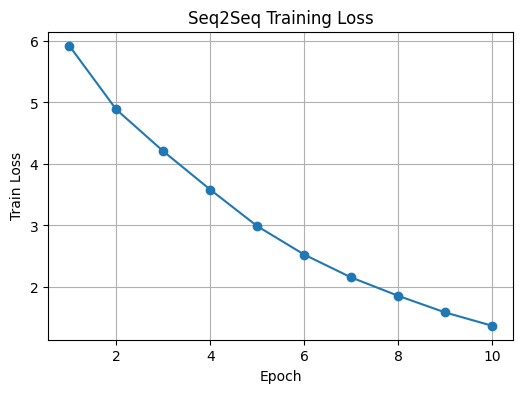

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(range(1, N_EPOCHS + 1), train_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.title('Seq2Seq Training Loss')
plt.grid(True)
plt.show()

In [18]:
# 어텐션용 추론 함수 정의
def translate_sentence(model, sentence_tensor, max_len=64):
    """
    sentence_tensor: (batch=1, seq_len)
    """
    model.eval()
    with torch.no_grad():
        # 인코더: 전체 시퀀스에 대해 outputs + hidden 반환
        encoder_outputs, hidden = model.encoder(sentence_tensor)   # (1, seq_len, hid_dim)

        batch_size = sentence_tensor.size(0)  # 1
        # 디코더 첫 입력: BOS 토큰
        input_token = torch.full(
            (batch_size,),
            BOS_TOKEN_ID,
            dtype=torch.long,
            device=sentence_tensor.device,
        )

        outputs = []

        for _ in range(max_len):
            output, hidden, attn_weights = model.decoder(input_token, hidden, encoder_outputs)  # (1, vocab)
            top1 = output.argmax(1)   # (1,)
            outputs.append(top1.item())
            input_token = top1        # 다음 시점 입력

        return outputs

아래 코드 셀에서 바닐라 Seq2Seq와 어텐션 버전의 번역 결과를 직접 비교해 보면서,  
긴 문장일수록 어텐션이 어떤 차이를 만드는지 정성적으로 확인해 보세요. 

In [19]:
# 번역 테스트 (Attention 버전)
sample = next(iter(train_loader))

# 1) 소스 문장 (영어) 텐서 준비
# DataLoader에서 나온 형태: (batch, seq_len)
src_batch = sample['input_ids'].to(device)      # (batch, seq_len)
trg_batch = sample['labels'].to(device)         # (batch, seq_len)

# 0번 샘플 하나만 뽑아서 인코더 입력 형태 (batch=1, seq_len)로 바꾸기
src_sample_enc = src_batch[0].unsqueeze(0)      # (seq_len,) -> (1, seq_len)

# 2) 모델로 번역 토큰 ID 생성
translation_ids = translate_sentence(model, src_sample_enc)

# 3) 토큰 ID → 텍스트 복원
src_text = tokenizer.decode(src_batch[0].tolist(), skip_special_tokens=True)
ref_text = tokenizer.decode(trg_batch[0].tolist(), skip_special_tokens=True)
pred_text = tokenizer.decode(translation_ids, skip_special_tokens=True)

# 4) 결과 출력
print("영어 원문 (source):")
print(src_text)
print("\n정답 번역 (target KO):")
print(ref_text)
print("\n모델 번역 (predicted KO):")
print(pred_text)

영어 원문 (source):
Contacting our customer service can provide you with assistance.

정답 번역 (target KO):
고객센터에 문의하시면 도움이 됩니다.

모델 번역 (predicted KO):
고객센터에 문의하면 도움이 됩니다.


In [24]:
# BLEU 측정을 위한 준비
import sacrebleu

def compute_bleu(model, dataloader, tokenizer, max_len=64, max_batches=None):
    import sacrebleu
    model.eval()
    device = next(model.parameters()).device  # 모델 파라미터가 올라가 있는 디바이스
    all_refs, all_hyps = [], []

    with torch.no_grad():
        for i, batch in tqdm(enumerate(dataloader)):
            if max_batches is not None and i >= max_batches:
                break
            src = batch["input_ids"].to(device)
            refs_batch = batch["labels"]

            for j in range(src.size(0)):
                pred_ids = translate_sentence(model, src[j].unsqueeze(0))
                hyp = tokenizer.decode(pred_ids, skip_special_tokens=True)

                ref_ids = refs_batch[j].tolist()
                ref = tokenizer.decode(ref_ids, skip_special_tokens=True)

                all_hyps.append(hyp)
                all_refs.append([ref])

    bleu = sacrebleu.corpus_bleu(all_hyps, list(map(list, zip(*all_refs))))
    return bleu

# 예시: test_loader 전체 평가
bleu = compute_bleu(model, test_loader, tokenizer, max_len=64)
print(f"BLEU: {bleu.score:.2f}")

15it [00:53,  3.56s/it]

BLEU: 10.32
